## NANO-CEMENT AS A PARTIAL REPLACEMENT FOR CEMENT IN CONCRETE
 - In this paper, machine learning algorithms were used to develop a model to predict the compressive strength of concrete. The machine learning algorithm used in this paper were; KNearest Neighbour, Random Forest Regressor, CatBoost Regressor, and XGBoost Regressor. The use of nano cement is an effective way to minimize environmental pollution and increase the strength of concrete. Ultimately, this reduces the amount of cement used in the production of concrete. The performance of our model was measured with root mean square error (RMSE), mean absolute error (MAE), and the coefficient of determination (R²).
 - In this python notebook, an indepth exploratory analysis was done into the results of the project, classified based on the number of curing days.
 - Keywords: Nano silica, Micro silica, Compressive strength

In [ ]:
#Import the necessary libraries
import pandas as pd #To interact with the dataframe
import numpy as np #To deal with data in arrays
import plotly.express as px #For visualization
import matplotlib.pyplot as plt#For visualization
import seaborn as sns

In [ ]:
nano = pd.read_csv(r"/content/sample_data/Nano.csv") #Read the csv file of the results

In [ ]:
nano.head() #Display the first five rows

,No.,W/C (Ratio per mass),Curing time (Days),Nanosillica (NS),Microsilica (MS),Compressive strength(Mpa),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1,0.4,3,0.00,0,15.51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.4,3,1.40,0,16.85,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.4,3,4.20,0,23.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.4,3,2.80,0,21.57,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.4,3,0.00,4,18.88,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nano['W/C (Ratio per mass)'].value_counts() #Display the unique water cement ratios, and their respective counts

0.50    98
0.40    90
0.60     9
0.84     8
Name: W/C (Ratio per mass), dtype: int64

In [ ]:
nano = nano[nano["Curing time (Days)"]!=90] #Remove the rows with 90 days curing

In [ ]:
nano.dropna(axis=1, inplace=True) #Drop the empty columns

In [ ]:
nano = nano[nano["Nanosillica (NS)"] != "I"]

In [ ]:
print(nano.isnull().sum()) #Display the number of missing values in each column

No.                          0
W/C (Ratio per mass)         0
Curing time (Days)           0
Nanosillica (NS)             0
Microsilica (MS)             0
Compressive strength(Mpa)    0
dtype: int64


From the above, it is seen there are no missing values

In [ ]:
nano.columns #Display the column names in the data

Index(['No.', 'W/C (Ratio per mass)', 'Curing time (Days)', 'Nanosillica (NS)',
       'Microsilica (MS)', 'Compressive strength(Mpa)'],
      dtype='object')

In [ ]:
nano["Compressive strength(Mpa)"].min() #Get the minimum compressive strength

14.0

In [ ]:
nano["Compressive strength(Mpa)"].max() #Get the maximum compressive strength

66.87

The results were classified based on the number of curing days, 3 days, 7 days, 14 days, 21 days and 28 days. The resulting compressive strengths were grouped into:
 - Low compressive strength: Less than 17Mpa
 - Moderate Compressive strength: Between 17 and 30MPa
 - High compressive strength: Between 30 and 50MPa
 - Very high compressive strength: Above 50MPa

In [ ]:
#Splitting the compressive strength into 5 levels

def comp_str(x):
    """
    This function takes in the
    compressive strength and
    classifies it into levels
    """
    if x <= 17:
        return "Low compressive strength"
    elif 17<x<=30:
        return "Moderate Compressive strength"
    elif 30<x<=50:
        return "High compressive strength"
    elif x>50:
        return "Very high compressive strength"
    
print(comp_str.__doc__)


    This function takes in the
    compressive strength and
    classifies it into levels
    


In [ ]:
nano["comp strength"] = nano["Compressive strength(Mpa)"].map(comp_str) #mapping the functiion to the compressive strength column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
nano["comp strength"].value_counts() #Return the result of the operation in terms on the unique values and counts

High compressive strength         125
Moderate Compressive strength      59
Very high compressive strength     10
Low compressive strength            7
Name: comp strength, dtype: int64

## Data Exploration

#### Curing Days

In [ ]:
nano["Curing time (Days)"].value_counts() #Get the unique curing days and their respective counts

7     50
28    49
3     36
14    34
21    32
Name: Curing time (Days), dtype: int64

In [ ]:
c_days = nano.groupby("Curing time (Days)") #Group the data by the curing days

### Three days

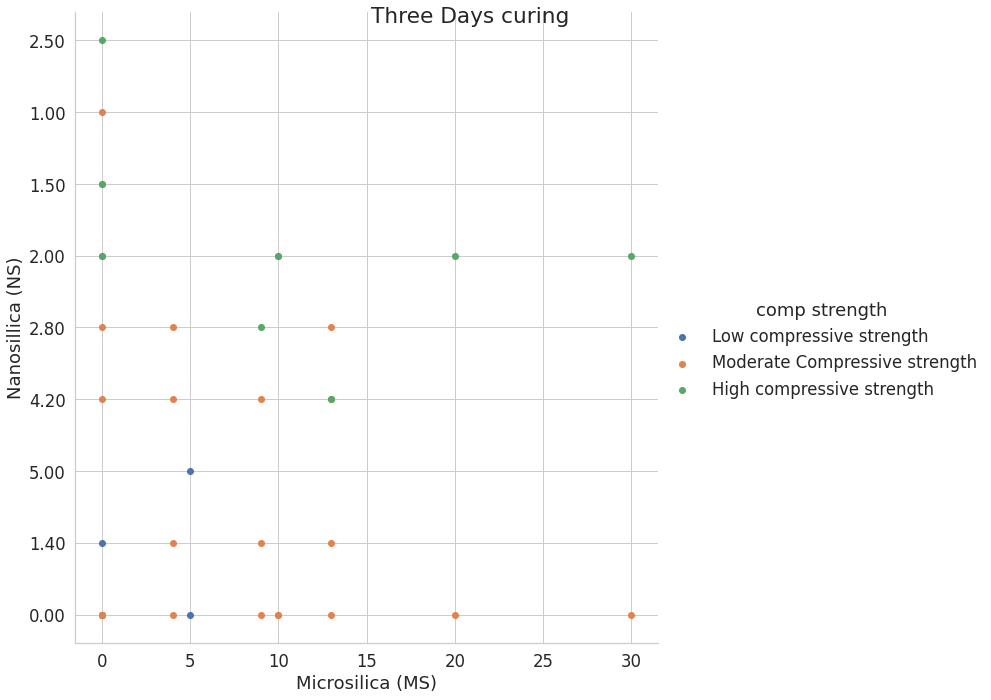

In [ ]:
#3 days
three_days=c_days.get_group(3)

#Scatter plot showing the relationship between micro and nanosilica using the compressive strength as hue
sns.set(font_scale = 1.5)#set the font for ticks and labels
sns.set_style("whitegrid")
g = sns.FacetGrid(three_days, hue="comp strength", height=10, aspect=1)
g.map(plt.scatter, 'Microsilica (MS)','Nanosillica (NS)')
g.fig.suptitle('Three Days curing')
g.add_legend();
plt.show()

It can be  seen in the figure above that after three days, none of the cubes produced a very high compressive strength i.e. a compressive strength of above 50MPa. The percentage of nanosilica with the highest number of high compressive strengths (between 30 and 50MPa) was 2%, all percentages of microsilica mixed with 2% nanosilica had little or no change in the compressive strength, as they were all classified as high compressive strengths.

In [ ]:
three_days["comp strength"].value_counts()

Moderate Compressive strength    24
High compressive strength         8
Low compressive strength          4
Name: comp strength, dtype: int64

### 7days

In [ ]:
seven_days = c_days.get_group(7)

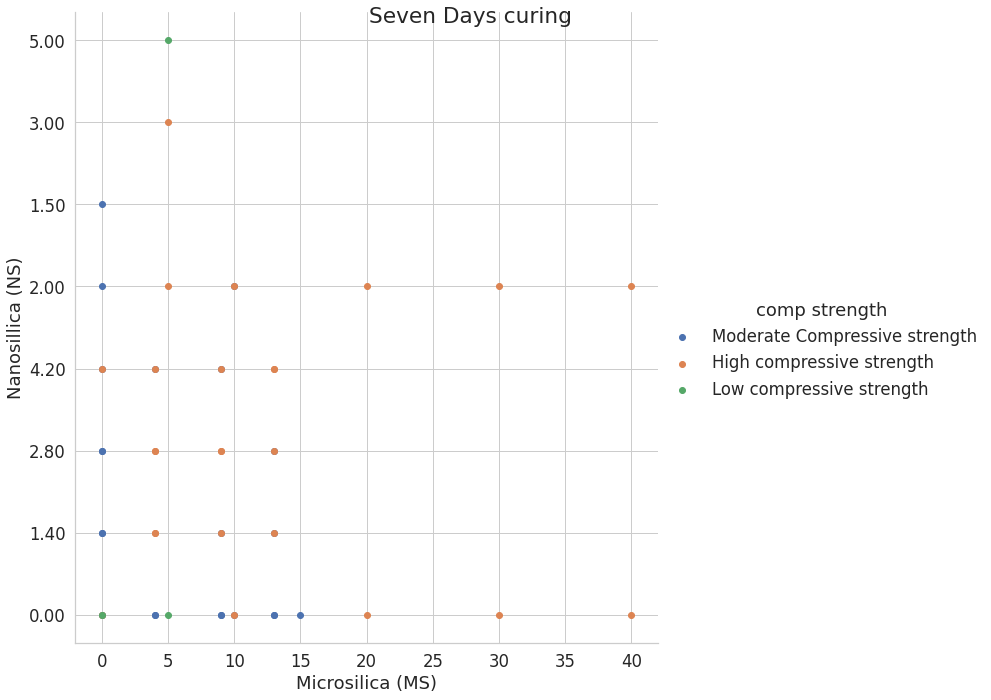

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
g = sns.FacetGrid(seven_days, hue="comp strength", height=10, aspect=1)
g.map(plt.scatter, 'Microsilica (MS)','Nanosillica (NS)')
g.fig.suptitle('Seven Days curing')
g.set_titles("Three curing days")
g.add_legend();
plt.show()

The results after seven days curing produced almost the same results as the three day curing, as 2% Nano silica was found to be the optimal percentage for high compressive strength. 4.2% Nanosilica with 0%,5%,8%,13% microsilica also produced high compressive strengths, with 5% Nanosilica producing a very low compressive strength.

### 14 days

In [ ]:
fourteen = c_days.get_group(14) #Get the data for 14 days

In [ ]:
fourteen["comp strength"].value_counts()

High compressive strength        27
Moderate Compressive strength     7
Name: comp strength, dtype: int64

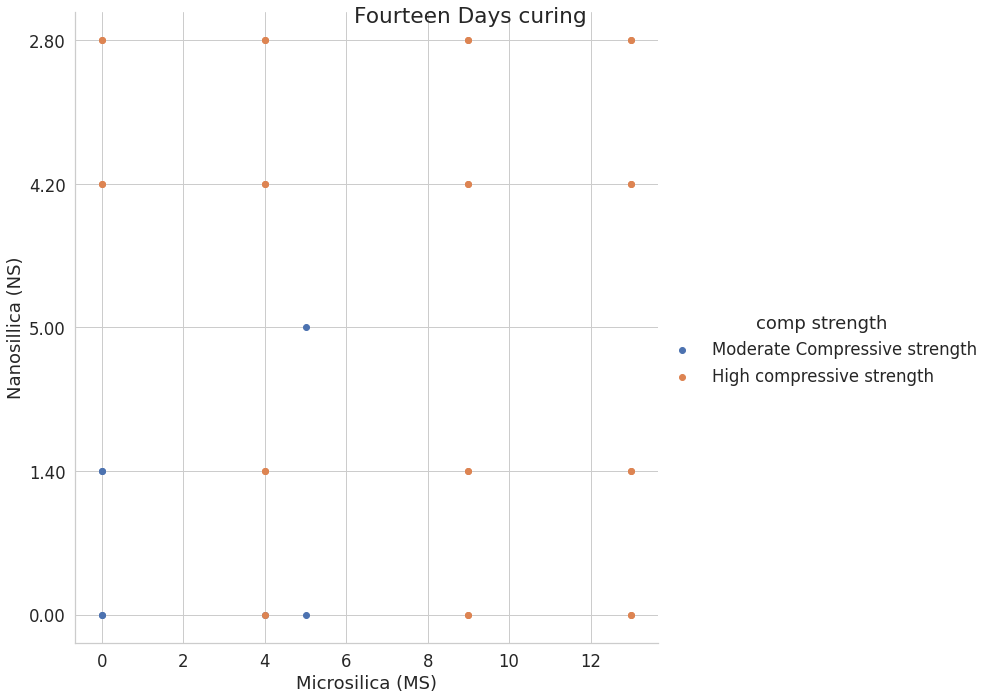

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
g = sns.FacetGrid(fourteen, hue="comp strength", height=10, aspect=1)
g.map(plt.scatter, 'Microsilica (MS)','Nanosillica (NS)')
g.fig.suptitle('Fourteen Days curing')
g.set_titles("Three curing days")
g.add_legend();
plt.show()

After fourteen days, no low compressive strengths were recorded, no very high compressive strengths were recorded either. 2.8% and 4.2% Nanosilica producing high compressive strengths.

## 21 days

In [ ]:
two_one = c_days.get_group(21) #Get the dats for 21 days

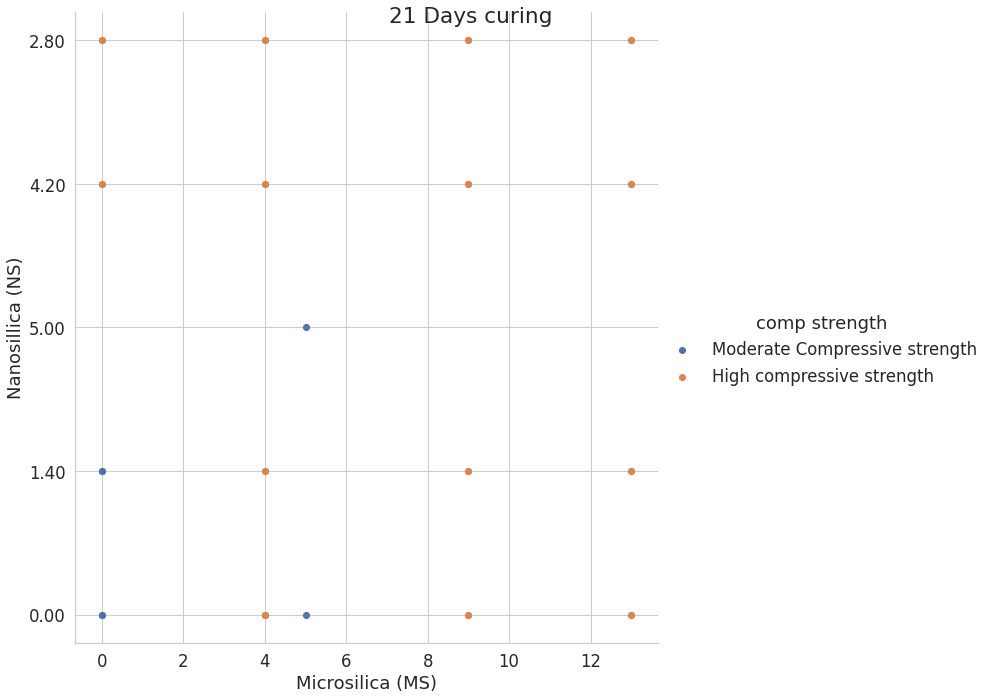

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
g = sns.FacetGrid(fourteen, hue="comp strength", height=10, aspect=1)
g.map(plt.scatter, 'Microsilica (MS)','Nanosillica (NS)')
g.fig.suptitle('21 Days curing')
g.set_titles("Three curing days")
g.add_legend();
plt.show()

At the 21 day mark, normal and high compressive strengths were obtained with no record of low or very high ccomppressive strengths, with 4.2% Nanosilica being the dominating percentage.

### Twenty eight days

In [ ]:
two_eight = c_days.get_group(28) #Get the data for 28 days

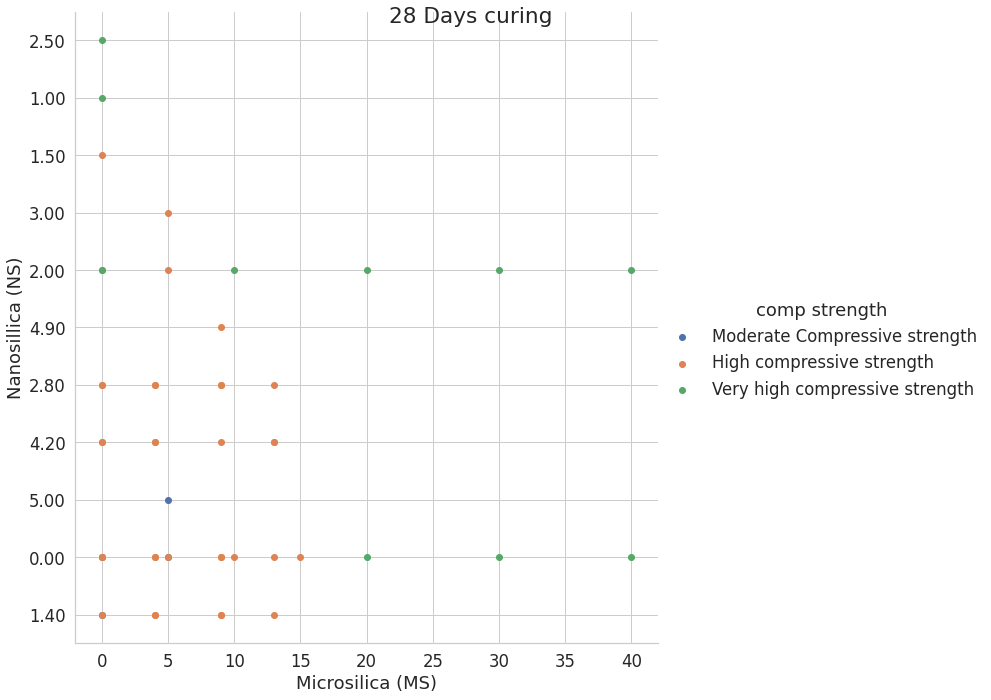

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
g = sns.FacetGrid(two_eight, hue="comp strength", height=10, aspect=1)
g.map(plt.scatter, 'Microsilica (MS)','Nanosillica (NS)')
g.fig.suptitle('28 Days curing')
g.set_titles("Three curing days")
g.add_legend();
plt.show()

The 28 day results produced ranges of different compressive strength values: from normal to high to very high. Showing the different percentages of the nanoproducts that were combined to give the compressive strengths.

## Line plots
A line plot tracking the compressive strengths at different percentages of the nanoproducts used

### _Nanosilica_

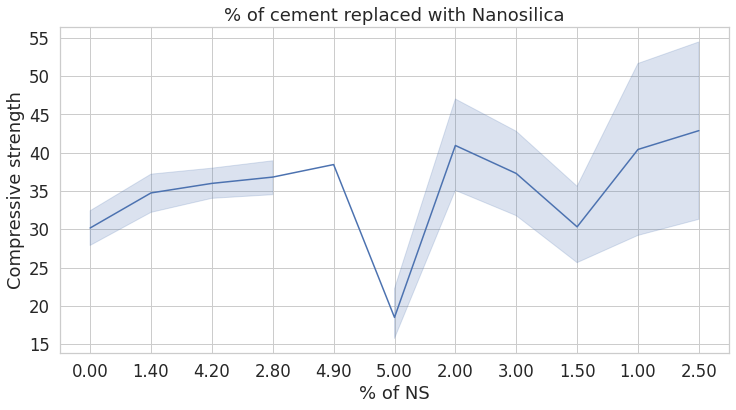

In [ ]:
fig=plt.figure(figsize=(12,6))#Create a figure
ax=fig.add_subplot(1,1,1)#Add an axis to the figure
ax.set_xlabel("% of NS")
ax.set_ylabel("Compressive strength")
ax.set_title("% of cement replaced with Nanosilica")
sns.lineplot(data= nano, x="Nanosillica (NS)", y="Compressive strength(Mpa)", ax=ax)

From the above figure, we can see there was a sharp decrease in the compressive strength at 5% of NS

In [ ]:
nano["Nanosillica (NS)"].value_counts()

0.00    60
4.20    36
1.40    35
2.80    35
2.00    20
5.00     4
1.50     4
3.00     2
1.00     2
2.50     2
4.90     1
Name: Nanosillica (NS), dtype: int64

### _Microsilica_

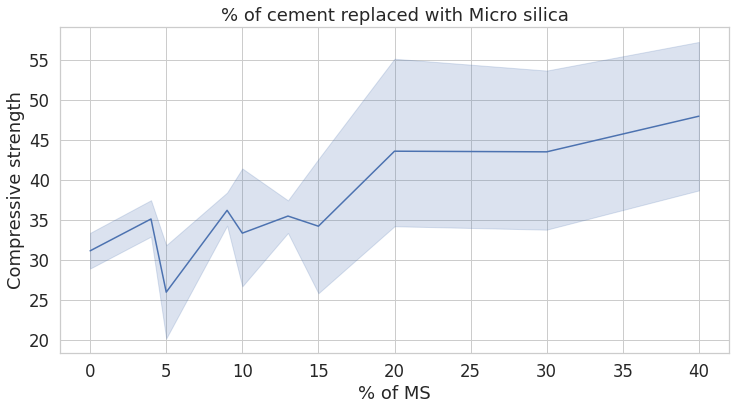

In [ ]:
fig=plt.figure(figsize=(12,6))#Create a figure
ax=fig.add_subplot(1,1,1)#Add an axis to the figure
ax.set_xlabel("% of MS")
ax.set_ylabel("Compressive strength")
ax.set_title("% of cement replaced with Micro silica")
sns.lineplot(data= nano, x="Microsilica (MS)", y="Compressive strength(Mpa)", ax=ax)

It can be seen that with the increase of Microsilica, the compressive strength increases

## Authors
 - Alalade O.O.
 - Folarin O.O.
 - Omole A.O
 - Oladapo A.A.